<a href="https://colab.research.google.com/github/AlexAlexeyuk/AlexAlexeyuk/blob/master/Alexeyuk_Spam_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Цель**: 
**Задачи**:
**Выводы**:

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None

full_df = pd.read_csv("/content/spam.csv", encoding='latin-1')
df = full_df.iloc[:,:2]
df = df.rename(columns={"v1":"target", "v2":"text"})

In [2]:
df["text"] = df["text"].str.lower()
df.head()

,target,text
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [3]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["text_wo_punct"] = df["text"].apply(lambda text: remove_punctuation(text))
df.head()

,target,text,text_wo_punct
0,ham,"go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...
1,ham,ok lar... joking wif u oni...,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say
4,ham,"nah i don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [4]:
stopwords = "i, me, my, myself, we, our, ours, ourselves, you, you're, you've, \
you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, \
she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, \
themselves, what, which, who, whom, this, that, that'll, these, those, am, is,\
 are, was, were, be, been, being, have, has, had, having, do, does, did, doing,\
  a, an, the, and, but, if, or, because, as, until, while, of, at, by, for,\
   with, about, against, between, into, through, during, before, after, above,\
    below, to, from, up, down, in, out, on, off, over, under, again, further, \
    then, once, here, there, when, where, why, how, all, any, both, each, few,\
     more, most, other, some, such, no, nor, not, only, own, same, so, than, \
     too, very, s, t, can, will, just, don, don't, should, should've, now, d, \
     ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, \
     doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, \
     ma, mightn, mightn't, mustn, mustn't, needn, needn't, shan, shan't,\
      shouldn, shouldn't, wasn, wasn't, weren, weren't, won, won't, wouldn,\
       wouldn't"


In [5]:
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in \
                     stopwords])

df["text_wo_stop"] = df["text_wo_punct"].apply(lambda text:\
                                               remove_stopwords(text))
df.head()

,target,text,text_wo_punct,text_wo_stop
0,ham,"go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,go jurong point crazy available bugis great wo...
1,ham,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say
4,ham,"nah i don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah dont think goes usf lives around though


In [6]:
df.groupby("target").describe()

text         ...                                       text_wo_stop     
       count unique  ...                                                top freq
target               ...                                                        
ham     4825   4515  ...                                   sorry call later   30
spam     747    653  ...  camera awarded sipix digital camera call 09061...    4

[2 rows x 12 columns]

In [7]:
df['target'] = df['target'].map( {'spam': 1, 'ham': 0} ).astype(int)
df.head(15)

,target,text,text_wo_punct,text_wo_stop
0,0,"go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,go jurong point crazy available bugis great wo...
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni
2,1,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say
4,0,"nah i don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah dont think goes usf lives around though
5,1,freemsg hey there darling it's been 3 week's n...,freemsg hey there darling its been 3 weeks now...,freemsg darling 3 weeks word back like fun sti...
6,0,even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...,even brother like speak treat like aids patent
7,0,as per your request 'melle melle (oru minnamin...,as per your request melle melle oru minnaminun...,per request melle melle oru minnaminunginte nu...
8,1,winner!! as a valued network customer you have...,winner as a valued network customer you have b...,winner valued network customer selected receiv...
9,1,had your mobile 11 months or more? u r entitle...,had your mobile 11 months or more u r entitled...,mobile 11 months entitled update latest colour...


In [8]:
df['length'] = df['text_wo_stop'].apply(len)

In [9]:
df.head(10)

,target,text,text_wo_punct,text_wo_stop,length
0,0,"go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,go jurong point crazy available bugis great wo...,78
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni,21
2,1,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,135
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say,29
4,0,"nah i don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah dont think goes usf lives around though,43
5,1,freemsg hey there darling it's been 3 week's n...,freemsg hey there darling its been 3 weeks now...,freemsg darling 3 weeks word back like fun sti...,82
6,0,even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...,even brother like speak treat like aids patent,46
7,0,as per your request 'melle melle (oru minnamin...,as per your request melle melle oru minnaminun...,per request melle melle oru minnaminunginte nu...,113
8,1,winner!! as a valued network customer you have...,winner as a valued network customer you have b...,winner valued network customer selected receiv...,122
9,1,had your mobile 11 months or more? u r entitle...,had your mobile 11 months or more u r entitled...,mobile 11 months entitled update latest colour...,102


In [10]:
from collections import Counter
cnt = Counter()
for text in df["text_wo_stop"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('call', 576),
 ('2', 478),
 ('get', 386),
 ('4', 287),
 ('dont', 279),
 ('go', 278),
 ('ok', 277),
 ('ltgt', 276),
 ('free', 275),
 ('know', 257)]

In [11]:
from nltk.stem.porter import PorterStemmer

# Drop the two columns 
#df.drop(["text_wo_stopfreq", "text_wo_stopfreqrare"], axis=1, inplace=True) 

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["text_stemmed"] = df["text_wo_stop"].apply(lambda text: stem_words(text))

df.head()

,target,text,text_wo_punct,text_wo_stop,length,text_stemmed
0,0,"go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,go jurong point crazy available bugis great wo...,78,go jurong point crazi avail bugi great world l...
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni,21,ok lar joke wif oni
2,1,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,135,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say,29,dun say earli hor alreadi say
4,0,"nah i don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah dont think goes usf lives around though,43,nah dont think goe usf live around though


In [12]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["text_lemmatized"] = df["text_wo_stop"].apply(lambda text: lemmatize_words(text))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,target,text,text_wo_punct,text_wo_stop,length,text_stemmed,text_lemmatized
0,0,"go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,go jurong point crazy available bugis great wo...,78,go jurong point crazi avail bugi great world l...,go jurong point crazy available bugis great wo...
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni,21,ok lar joke wif oni,ok lar joking wif oni
2,1,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,135,free entri 2 wkli comp win fa cup final tkt 21...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say,29,dun say earli hor alreadi say,dun say early hor already say
4,0,"nah i don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah dont think goes usf lives around though,43,nah dont think goe usf live around though,nah dont think go usf life around though


In [13]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df["text_lemmatized"] = df["text_wo_stop"].apply(lambda text: lemmatize_words(text))

df.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,target,text,text_wo_punct,text_wo_stop,length,text_stemmed,text_lemmatized
0,0,"go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,go jurong point crazy available bugis great wo...,78,go jurong point crazi avail bugi great world l...,go jurong point crazy available bugis great wo...
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni,21,ok lar joke wif oni,ok lar joking wif oni
2,1,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,135,free entri 2 wkli comp win fa cup final tkt 21...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say,29,dun say earli hor alreadi say,dun say early hor already say
4,0,"nah i don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah dont think goes usf lives around though,43,nah dont think goe usf live around though,nah dont think go usf life around though


In [14]:

df.head()

,target,text,text_wo_punct,text_wo_stop,length,text_stemmed,text_lemmatized
0,0,"go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,go jurong point crazy available bugis great wo...,78,go jurong point crazi avail bugi great world l...,go jurong point crazy available bugis great wo...
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni,21,ok lar joke wif oni,ok lar joking wif oni
2,1,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,135,free entri 2 wkli comp win fa cup final tkt 21...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say,29,dun say earli hor alreadi say,dun say early hor already say
4,0,"nah i don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah dont think goes usf lives around though,43,nah dont think goe usf live around though,nah dont think go usf life around though


In [15]:
data = df.drop(['text', 'text_stemmed', 'text_wo_punct', 'text_wo_stop', 'length' ], axis = 1)
data.head()

,target,text_lemmatized
0,0,go jurong point crazy available bugis great wo...
1,0,ok lar joking wif oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,dun say early hor already say
4,0,nah dont think go usf life around though


In [17]:
#!pip install h2o
import h2o
h2o.init()

     |████████████████████████████████| 129.4MB 85kB/s 
  Created wheel for h2o: filename=h2o-3.30.1.3-py2.py3-none-any.whl size=129446676 sha256=fd6a35f2ed1e0b11e53b3fb73edb038e56916e958606bd717aa4c8ff20a07f54
  Stored in directory: /root/.cache/pip/wheels/3d/e6/07/53ce9be9cb61b33a79cb3ed1fc39f2dae84f6ee6fe1e373e5e
Successfully built h2o
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.9" 2020-10-20; OpenJDK Runtime Environment (build 11.0.9+11-Ubuntu-0ubuntu1.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.9+11-Ubuntu-0ubuntu1.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpt3iwnata
  JVM stdout: /tmp/tmpt3iwnata/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpt3iwnata/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connectin

H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,1 month and 16 days
H2O_cluster_name:,H2O_from_python_unknownUser_ihy66g
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [18]:
from h2o.estimators.word2vec import H2OWord2vecEstimator
from h2o.estimators import H2OKMeansEstimator

In [19]:
def tokenize(sentences, stop_word = stopwords):
    tokenized = sentences.tokenize("\\W+")
    tokenized_lower = tokenized.tolower()
    tokenized_filtered = tokenized_lower[(tokenized_lower.nchar() >= 2) | \
                                         (tokenized_lower.isna()),:]
    tokenized_words = tokenized_filtered[tokenized_filtered.grep("[0-9]",\
                                          invert=True,output_logical=True),:]
    tokenized_words = tokenized_words[(tokenized_words.isna()) |\
                                      (~ tokenized_words.isin(stopwords)),:]
    return tokenized_words

In [20]:
df = h2o.H2OFrame(data, column_names=['target', 'text_lemmatized'],
                    column_types=["enum", "string"])
                            

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [21]:
words = tokenize(df["text_lemmatized"])

In [22]:
words.head()


C1
go
jurong
point
crazy
available
bugis
great
world
la
buffet


In [23]:
# Train Word2Vec Model for vec size = 100
w2v_model = H2OWord2vecEstimator(vec_size = 100, model_id = "w2v.hex")
w2v_model.train(training_frame=words)

word2vec Model Build progress: |██████████████████████████████████████████| 100%


In [24]:
# Sanity check - find synonyms for the word 'free'
w2v_model.find_synonyms("free", count = 5)

OrderedDict([('mobile', 0.9327009916305542),
             ('colour', 0.9271311163902283),
             ('camcorder', 0.9179847836494446),
             ('unlimited', 0.906732976436615),
             ('sub', 0.9031696915626526)])

In [25]:
# Sanity check - find synonyms for the word 'hello'
w2v_model.find_synonyms("hello", count = 5)

OrderedDict([('real', 0.8182665109634399),
             ('name', 0.7614724040031433),
             ('wen', 0.7317385077476501),
             ('dis', 0.7236335873603821),
             ('sound', 0.7206015586853027)])

In [26]:
word_embeddings = w2v_model.to_frame()
word_embeddings.head()

Word,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
ray,0.0219893,-0.250544,-0.0439175,0.00712865,0.0471008,-0.0183493,-0.104025,-0.102403,-0.0537179,0.0223588,-0.0842974,-0.0763446,0.0174523,-0.0377941,-0.104428,0.0555096,0.024826,0.00592764,-0.061622,0.00838972,-0.0385395,-0.0181874,0.0495765,0.0498546,-0.0130268,0.0536631,0.0831113,0.0382678,0.0370658,-0.0792803,-0.00315096,0.0969618,-0.0361456,0.0267713,0.139127,0.0485782,0.0142984,0.13205,0.108376,0.0186287,0.00618254,0.0828257,0.0108319,-0.0138516,-0.0488193,-0.0334396,-0.0147024,0.131217,-0.055336,0.20377,0.00692977,-0.0715229,0.0496374,0.119153,-0.0480555,0.0493718,0.132888,-0.0676099,-0.131961,0.0943485,-0.164404,-0.105949,0.0439219,0.0188135,-0.00401465,0.0489512,0.103264,-0.0181899,0.152831,-0.0629264,-0.131946,0.000216444,0.171701,-0.0262275,-0.146277,-0.0410547,0.0452074,-0.072283,0.0752333,-0.00725331,-0.0205227,-0.0265594,-0.00697322,0.0790988,0.0111198,0.00507815,-0.124331,-0.0441059,0.114401,0.0132328,0.0338387,0.0486958,0.0315481,0.0290712,-0.00642729,0.0279686,-0.00589885,-0.0287302,0.0166229,-0.0157168
moral,0.041352,-0.186667,-0.0133845,0.0821431,0.0305148,-0.0846577,-0.0235371,-0.0693551,-0.100771,0.000643891,-0.0845,-0.0271826,0.0187376,-0.0950831,-0.0340895,-0.0418326,-0.133885,0.0212575,0.00790086,-0.0127005,0.0190194,-0.0411912,0.0209325,-0.00849355,-0.00571238,0.0496218,0.0152067,0.0433506,0.0457821,-0.0846271,-0.00855699,0.118452,0.0118556,0.013325,0.0704803,-0.105088,-0.0761545,0.150425,0.0266008,-0.0409012,-0.101017,-0.0185087,-0.0110865,0.0342673,-0.000794585,-0.0194575,0.107575,0.116573,-0.0421517,0.246126,-0.0149517,-0.013205,-0.0756126,0.0347458,0.0268481,-0.0963209,0.196683,-0.0336064,0.0237397,0.0466556,-0.129738,-0.0149744,0.120218,0.0712537,0.0396137,-0.0230396,-0.16585,0.0230288,0.143072,0.0060293,-0.0777378,-0.00300309,0.0207954,0.0219374,-0.144988,-0.0753959,0.0266775,-0.0277061,0.00235469,-0.00444163,0.0267199,-0.0336325,0.0558117,-0.0532464,0.013761,0.0906893,0.0129855,-0.0659842,0.105181,0.00928668,-0.0276821,-0.106232,0.0586772,0.0827944,0.0132298,-0.00229895,0.0530643,0.0509435,0.0455215,-0.0619816
wet,0.0932679,-0.115864,-0.0877303,0.0996028,0.0265512,-0.0208349,-0.0257615,-0.0503695,-0.0673917,-0.0399258,-0.0607688,-0.155932,-0.0348016,0.00762547,-0.0247729,-0.0166098,-0.0859964,0.0499872,-0.0118903,-0.00756464,-0.0137462,0.0218108,0.0852399,0.0636406,-0.00523845,0.0273917,-0.0452862,0.108925,0.0709039,-0.0381217,0.0440698,0.170264,0.00449365,-0.0118822,0.00385248,-0.00133634,-0.0577427,0.107849,0.0822338,-0.0652445,-0.122623,0.0184653,-0.0356306,0.00969579,0.0663075,0.0303789,0.0792762,0.0809423,0.0129921,0.173504,-0.0305841,-0.0205888,-0.029243,0.032234,0.0105176,0.0494135,0.133149,-0.103718,0.075113,-0.0273711,-0.114704,0.0464735,0.0690116,-0.00881035,0.0381177,-0.0208901,-0.00103158,0.0602328,0.0314499,-0.00289609,-0.0731409,-0.0278571,0.0292668,0.00612781,-0.0692801,-0.0645541,0.0578288,-0.026058,0.0689279,0.0526126,-0.00313272,0.0399038,-0.0345916,-0.0562585,0.0109579,-0.0376989,-0.0168148,0.0213,0.0804773,0.0196919,0.0216799,-0.0693189,-0.0232708,-0.00414031,0.0555145,0.0551056,-0.0262809,-0.0944209,0.0204531,-0.0462516
art,0.0411157,-0.104291,-0.034042,0.0871681,0.00162859,-0.06477,-0.0334458,-0.0241777,-0.0712569,-0.0368307,-0.0235714,-0.0529107,0.00344164,-0.00939693,-0.0208121,-0.0351351,-0.0628315,0.0169209,-0.0359516,-0.0208826,0.00180166,0.000154714,0.0535481,0.0530803,0.00696703,0.0465273,-0.0135365,0.043611,0.0385598,-0.0505123,-0.00809202,0.119043,-0.0221685,0.0300485,0.0343499,-0.00308398,-0.0774138,0.139397,0.0604284,-0.0513637,-0.107463,0.0215346,-0.00980221,-0.00882216,0

In [27]:

from h2o.estimators import H2OKMeansEstimator

kmeans = H2OKMeansEstimator(model_id = "word_segments.hex",
                            estimate_k = True, k = 2, # Max number of clusters
                            seed = 1234)

In [28]:
x = list(set(word_embeddings.col_names) - set(["Word"]))
kmeans.train(x = x, training_frame = word_embeddings)

kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [29]:
# Clusters
kmeans.centroid_stats()


Centroid Statistics: 


,,centroid,size,within_cluster_sum_of_squares
0,,1.0,245.0,52226.478070
1,,2.0,1161.0,61598.462379


In [30]:
word_clusters = word_embeddings.cbind(kmeans.predict(word_embeddings))
word_clusters[["Word", "predict"]].head()

kmeans prediction progress: |█████████████████████████████████████████████| 100%


Word,predict
ray,1
moral,1
wet,1
art,1
jazz,1
island,0
cartoon,1
bin,1
bar,1
plane,1


In [31]:
selected_words = ['2', 'get', 'ltgt',
 'ok',  'dont', 'go','know', 'got', 'like', 'call' ,'free', 'txt','mobile',
 'text', 'claim', 'stop', 'reply']
selected_clusters = word_clusters[word_clusters["Word"].isin(selected_words)]

In [32]:
print("Cluster 1")
print(selected_clusters[selected_clusters["predict"] == 0, "Word"])

Cluster 1


Word
claim
mobile
reply
stop
txt
text
free
call


In [33]:
print("Cluster 2")
print(selected_clusters[selected_clusters["predict"] == 1, "Word"])

Cluster 2


Word
like
ltgt
ok
dont
know
go
get


In [34]:
# Calculate a vector for each review
review_vecs = w2v_model.transform(words, aggregate_method = "AVERAGE")

In [35]:
review_vecs.dim

[5572, 100]

In [36]:
type(df)

h2o.frame.H2OFrame

In [37]:
# Add aggregated word embeddings 
ext_df = df.cbind(review_vecs)

In [38]:
train,test  = ext_df.split_frame(ratios=[.8])

In [39]:
train.dim

[4464, 102]

In [40]:
test.dim

[1108, 102]

In [42]:
from h2o.estimators import H2OGradientBoostingEstimator
predictors = review_vecs.names
response = 'target'

gbm_embeddings = H2OGradientBoostingEstimator(stopping_metric = "AUC", stopping_tolerance = 0.001,
                                              stopping_rounds = 5, score_tree_interval = 10,
                                              model_id = "gbm_embeddings.hex", ntrees = 1000,
                                             )
gbm_embeddings.train(x = predictors, y = response, 
                   training_frame = train, validation_frame = test
                  )

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [ ]:
gbm_embeddings.auc

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm_embeddings.hex


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,160.0,160.0,53459.0,5.0,5.0,5.0,11.0,30.0,21.86875




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0004979385700805463
RMSE: 0.02231453719171756
LogLoss: 0.004350731980235112
Mean Per-Class Error: 0.0015723270440251014
AUC: 0.9999612023196929
AUCPR: 0.9997837041687152
Gini: 0.9999224046393858

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8669098370934649: 


,,0,1,Error,Rate
0,0,3850.0,0.0,0.0,(0.0/3850.0)
1,1,2.0,634.0,0.0031,(2.0/636.0)
2,Total,3852.0,634.0,0.0004,(2.0/4486.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.866910,0.998425,174.0
1,max f2,0.866910,0.997483,174.0
2,max f0point5,0.866910,0.999369,174.0
3,max accuracy,0.866910,0.999554,174.0
4,max precision,0.999764,1.000000,0.0
5,max recall,0.027715,1.000000,187.0
6,max specificity,0.999764,1.000000,0.0
7,max absolute_mcc,0.866910,0.998167,174.0
8,max min_per_class_accuracy,0.866910,0.996855,174.0
9,max mean_per_class_accuracy,0.866910,0.998428,174.0



Gains/Lift Table: Avg response rate: 14.18 %, avg score: 14.18 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010031,0.999586,7.053459,7.053459,1.000000,0.999688,1.000000,0.999688,0.070755,0.070755,605.345912,605.345912,0.070755
1,2,0.020508,0.999455,7.053459,7.053459,1.000000,0.999512,1.000000,0.999598,0.073899,0.144654,605.345912,605.345912,0.144654
2,3,0.030317,0.999257,7.053459,7.053459,1.000000,0.999356,1.000000,0.999520,0.069182,0.213836,605.345912,605.345912,0.213836
3,4,0.040125,0.999114,7.053459,7.053459,1.000000,0.999178,1.000000,0.999436,0.069182,0.283019,605.345912,605.345912,0.283019
4,5,0.050156,0.998929,7.053459,7.053459,1.000000,0.999005,1.000000,0.999350,0.070755,0.353774,605.345912,605.345912,0.353774
5,6,0.100089,0.995823,7.053459,7.053459,1.000000,0.997735,1.000000,0.998544,0.352201,0.705975,605.345912,605.345912,0.705975
6,7,0.160053,0.027715,4.903334,6.247911,0.695167,0.680077,0.885794,0.879230,0.294025,1.000000,390.333403,524.791086,0.978701
7,8,0.200178,0.005791,0.000000,4.995546,0.000000,0.012220,0.708241,0.705442,0.000000,1.000000,-100.000000,399.554566,0.931948
8,9,0.300045,0.001421,0.000000,3.332838,0.000000,0.002847,0.472511,0.471592,0.000000,1.000000,-100.000000,233.283804,0.815584
9,10,0.400134,0.000761,0.000000,2.499164,0.000000,0.001042,0.354318,0.353889,0.000000,1.000000,-100.000000,149.916435,0.698961




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.021614103265911126
RMSE: 0.14701735702260169
LogLoss: 0.08237547791050462
Mean Per-Class Error: 0.03094941094941095
AUC: 0.990986370986371
AUCPR: 0.9484525300673923
Gini: 0.981972741972742

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1854332337064718: 


,,0,1,Error,Rate
0,0,956.0,19.0,0.0195,(19.0/975.0)
1,1,6.0,105.0,0.0541,(6.0/111.0)
2,Total,962.0,124.0,0.023,(25.0/1086.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.185433,0.893617,104.0
1,max f2,0.185433,0.924296,104.0
2,max f0point5,0.977786,0.923567,70.0
3,max accuracy,0.185433,0.976980,104.0
4,max precision,0.999796,1.000000,0.0
5,max recall,0.000785,1.000000,295.0
6,max specificity,0.999796,1.000000,0.0
7,max absolute_mcc,0.185433,0.882453,104.0
8,max min_per_class_accuracy,0.035844,0.965128,121.0
9,max mean_per_class_accuracy,0.035844,0.969051,121.0



Gains/Lift Table: Avg response rate: 10.22 %, avg score: 10.75 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010129,0.999437,9.783784,9.783784,1.000000,0.999587,1.000000,0.999587,0.099099,0.099099,878.378378,878.378378,0.099099
1,2,0.020258,0.999309,9.783784,9.783784,1.000000,0.999379,1.000000,0.999483,0.099099,0.198198,878.378378,878.378378,0.198198
2,3,0.030387,0.999063,9.783784,9.783784,1.000000,0.999155,1.000000,0.999373,0.099099,0.297297,878.378378,878.378378,0.297297
3,4,0.040516,0.998449,8.894349,9.561425,0.909091,0.998746,0.977273,0.999216,0.090090,0.387387,789.434889,856.142506,0.386362
4,5,0.050645,0.997801,9.783784,9.605897,1.000000,0.998136,0.981818,0.999000,0.099099,0.486486,878.378378,860.589681,0.485461
5,6,0.100368,0.730971,7.428428,8.527151,0.759259,0.957281,0.871560,0.978332,0.369369,0.855856,642.842843,752.715100,0.841497
6,7,0.157459,0.027715,2.051439,6.179232,0.209677,0.144970,0.631579,0.676178,0.117117,0.972973,105.143854,517.923186,0.908358
7,8,0.200737,0.005278,0.000000,4.847012,0.000000,0.012508,0.495413,0.533093,0.000000,0.972973,-100.000000,384.701215,0.860152
8,9,0.300184,0.001297,0.181181,3.301277,0.018519,0.002657,0.337423,0.357366,0.018018,0.990991,-81.881882,230.127674,0.769453
9,10,0.400552,0.000681,0.089759,2.496552,0.009174,0.000939,0.255172,0.268054,0.009009,1.000000,-91.024052,149.655172,0.667692




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-11-14 11:36:52,0.136 sec,0.0,0.348819,0.408172,0.500000,0.141774,1.000000,0.858226,0.305497,0.336931,0.500000,0.102210,1.000000,0.897790
1,,2020-11-14 11:36:54,2.042 sec,10.0,0.171837,0.139416,0.991052,0.974397,7.053459,0.016496,0.173295,0.136454,0.988187,0.921817,9.783784,0.028545
2,,2020-11-14 11:36:55,3.043 sec,20.0,0.122504,0.081423,0.991506,0.978664,7.053459,0.012929,0.148498,0.094480,0.988298,0.930975,9.783784,0.027624
3,,2020-11-14 11:36:55,3.915 sec,30.0,0.105389,0.059624,0.992210,0.981784,7.053459,0.010031,0.144303,0.082157,0.987226,0.929512,9.783784,0.028545
4,,2020-11-14 11:36:56,4.654 sec,40.0,0.092839,0.046655,0.993997,0.985922,7.053459,0.007356,0.143245,0.077738,0.987193,0.930746,9.783784,0.026703
5,,2020-11-14 11:36:57,5.368 sec,50.0,0.081904,0.035285,0.998210,0.993500,7.053459,0.005796,0.142465,0.075515,0.987591,0.931626,9.783784,0.025783
6,,2020-11-14 11:36:58,6.010 sec,60.0,0.070560,0.026798,0.999476,0.997671,7.053459,0.003344,0.142931,0.075001,0.988810,0.933327,9.783784,0.025783
7,,2020-11-14 11:36:58,6.630 sec,70.0,0.059816,0.020959,0.999715,0.998789,7.053459,0.002006,0.141744,0.073730,0.989517,0.931973,9.783784,0.024862
8,,2020-11-14 11:36:59,7.273 sec,80.0,0.049140,0.016260,0.999786,0.999080,7.053459,0.000669,0.141309,0.072402,0.990349,0.940735,9.783784,0.023941
9,,2020-11-14 11:36:59,7.838 sec,90.0,0.041137,0.012983,0.999827,0.999216,7.053459,0.000446,0.141791,0.072995,0.990303,0.941075,9.783784,0.025783



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C59,1248.103882,1.000000,0.491114
1,C42,429.550629,0.344163,0.169023
2,C87,86.424767,0.069245,0.034007
3,C63,69.155380,0.055408,0.027212
4,C27,66.682999,0.053427,0.026239
5,C86,45.154140,0.036178,0.017768
6,C73,43.542881,0.034887,0.017134
7,C68,29.019753,0.023251,0.011419
8,C67,24.085209,0.019297,0.009477
9,C19,22.170961,0.017764,0.008724



See the whole table with table.as_data_frame()


<bound method ModelBase.auc of >

In [43]:
gbm_embeddings.confusion_matrix(valid = True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4766683839815489: 


,,0,1,Error,Rate
0,0,939.0,6.0,0.0063,(6.0/945.0)
1,1,17.0,146.0,0.1043,(17.0/163.0)
2,Total,956.0,152.0,0.0208,(23.0/1108.0)


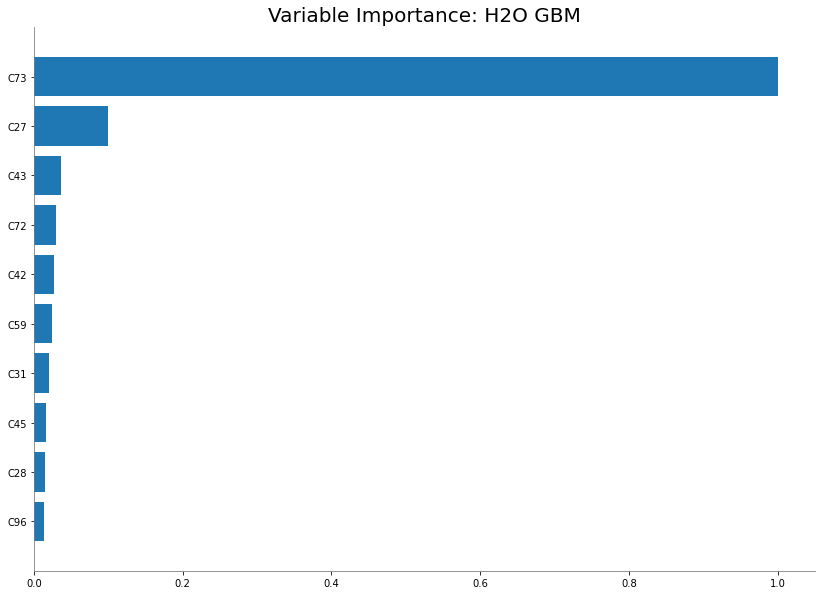

In [44]:
gbm_embeddings.varimp_plot()

In [45]:
top_w2v_features = list(filter(lambda x: x.startswith('C'), map(lambda x: x[0], gbm_embeddings.varimp())))[1:10]
top_w2v_features

['C27', 'C43', 'C72', 'C42', 'C59', 'C31', 'C45', 'C28', 'C96']

In [46]:
from h2o.estimators import H2OGeneralizedLinearEstimator

glm_predictors =  review_vecs.names

glm_embeddings = H2OGeneralizedLinearEstimator(model_id = "glm_embeddings.hex", interactions = top_w2v_features,
                                               family = "binomial"
                                              )
glm_embeddings.train(x = glm_predictors, y = response,
                     training_frame = train, validation_frame = test
                    )

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [47]:
print(glm_embeddings.auc)

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm_embeddings.hex


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 4.96E-4 )",136,77,7,py_23_sid_aa70




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.024739519850438083
RMSE: 0.15728801559698719
LogLoss: 0.09125460943484323
Null degrees of freedom: 4463
Residual degrees of freedom: 4386
Null deviance: 3463.624795204004
Residual deviance: 814.7211530342804
AIC: 970.7211530342804
AUC: 0.9841033664030504
AUCPR: 0.9421306161302471
Gini: 0.9682067328061008

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5133286461780128: 


,,0,1,Error,Rate
0,0,3836.0,44.0,0.0113,(44.0/3880.0)
1,1,90.0,494.0,0.1541,(90.0/584.0)
2,Total,3926.0,538.0,0.03,(134.0/4464.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.513329,0.880570,151.0
1,max f2,0.109695,0.886197,269.0
2,max f0point5,0.665422,0.916405,120.0
3,max accuracy,0.527805,0.969982,148.0
4,max precision,0.999875,1.000000,0.0
5,max recall,0.000813,1.000000,394.0
6,max specificity,0.999875,1.000000,0.0
7,max absolute_mcc,0.513329,0.864387,151.0
8,max min_per_class_accuracy,0.118267,0.940464,263.0
9,max mean_per_class_accuracy,0.109695,0.944455,269.0



Gains/Lift Table: Avg response rate: 13.08 %, avg score: 13.08 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010305,9.985634e-01,7.643836,7.643836,1.000000,0.999528,1.000000,0.999528,0.078767,0.078767,664.383562,664.383562,0.078767
1,2,0.020161,9.938428e-01,7.643836,7.643836,1.000000,0.996438,1.000000,0.998017,0.075342,0.154110,664.383562,664.383562,0.154110
2,3,0.030242,9.880599e-01,7.643836,7.643836,1.000000,0.990482,1.000000,0.995506,0.077055,0.231164,664.383562,664.383562,0.231164
3,4,0.040099,9.788119e-01,7.643836,7.643836,1.000000,0.984032,1.000000,0.992685,0.075342,0.306507,664.383562,664.383562,0.306507
4,5,0.050179,9.656393e-01,7.643836,7.643836,1.000000,0.972931,1.000000,0.988717,0.077055,0.383562,664.383562,664.383562,0.383562
5,6,0.100358,7.594716e-01,7.063723,7.353779,0.924107,0.891070,0.962054,0.939893,0.354452,0.738014,606.372309,635.377935,0.733632
6,7,0.150090,2.271205e-01,3.477601,6.069434,0.454955,0.471516,0.794030,0.784700,0.172945,0.910959,247.760089,506.943365,0.875392
7,8,0.200045,6.736073e-02,1.028319,4.810566,0.134529,0.126234,0.629339,0.620268,0.051370,0.962329,2.831869,381.056620,0.877019
8,9,0.299955,2.094343e-02,0.154248,3.259619,0.020179,0.037950,0.426438,0.426307,0.015411,0.977740,-84.575220,225.961922,0.779802
9,10,0.400090,9.721617e-03,0.102602,2.469481,0.013423,0.014458,0.323068,0.323229,0.010274,0.988014,-89.739818,146.948105,0.676416




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.02843558547217972
RMSE: 0.16862854287510082
LogLoss: 0.10578290069800295
Null degrees of freedom: 1107
Residual degrees of freedom: 1030
Null deviance: 928.0482789507755
Residual deviance: 234.41490794677443
AIC: 390.4149079467744
AUC: 0.9817995910020451
AUCPR: 0.9361087535585139
Gini: 0.9635991820040901

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5732775455958294: 


,,0,1,Error,Rate
0,0,937.0,8.0,0.0085,(8.0/945.0)
1,1,28.0,135.0,0.1718,(28.0/163.0)
2,Total,965.0,143.0,0.0325,(36.0/1108.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.573278,0.882353,117.0
1,max f2,0.151128,0.899408,165.0
2,max f0point5,0.573278,0.918367,117.0
3,max accuracy,0.573278,0.967509,117.0
4,max precision,0.999948,1.000000,0.0
5,max recall,0.002529,1.000000,369.0
6,max specificity,0.999948,1.000000,0.0
7,max absolute_mcc,0.573278,0.866088,117.0
8,max min_per_class_accuracy,0.135860,0.938650,171.0
9,max mean_per_class_accuracy,0.151128,0.944565,165.0



Gains/Lift Table: Avg response rate: 14.71 %, avg score: 13.96 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010830,9.993311e-01,6.797546,6.797546,1.000000,0.999640,1.000000,0.999640,0.073620,0.073620,579.754601,579.754601,0.073620
1,2,0.020758,9.955671e-01,6.797546,6.797546,1.000000,0.996973,1.000000,0.998365,0.067485,0.141104,579.754601,579.754601,0.141104
2,3,0.030686,9.880319e-01,6.797546,6.797546,1.000000,0.992093,1.000000,0.996336,0.067485,0.208589,579.754601,579.754601,0.208589
3,4,0.040614,9.764020e-01,6.797546,6.797546,1.000000,0.982076,1.000000,0.992850,0.067485,0.276074,579.754601,579.754601,0.276074
4,5,0.050542,9.676076e-01,6.179587,6.676161,0.909091,0.972162,0.982143,0.988786,0.061350,0.337423,517.958728,567.616126,0.336365
5,6,0.100181,7.739153e-01,6.426771,6.552589,0.945455,0.892866,0.963964,0.941258,0.319018,0.656442,542.677078,555.258940,0.652209
6,7,0.150722,3.566724e-01,4.491236,5.861357,0.660714,0.585958,0.862275,0.822116,0.226994,0.883436,349.123576,486.135704,0.859097
7,8,0.200361,8.712515e-02,1.112326,4.684795,0.163636,0.162956,0.689189,0.658810,0.055215,0.938650,11.232571,368.479522,0.865634
8,9,0.300542,2.247607e-02,0.428674,3.266088,0.063063,0.044360,0.480480,0.453994,0.042945,0.981595,-57.132593,226.608817,0.798526
9,10,0.399819,1.052995e-02,0.000000,2.455096,0.000000,0.015656,0.361174,0.345151,0.000000,0.981595,-100.000000,145.509563,0.682124




Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-11-14 12:10:36,0.000 sec,0,1731.812398,0.387951,,,,,,,,,,,,,,
1,,2020-11-14 12:10:36,0.520 sec,1,626.889038,0.146332,,,,,,,,,,,,,,
2,,2020-11-14 12:10:36,0.638 sec,2,497.920991,0.118362,,,,,,,,,,,,,,
3,,2020-11-14 12:10:36,0.783 sec,3,433.429679,0.104845,,,,,,,,,,,,,,
4,,2020-11-14 12:10:37,0.902 sec,4,413.830207,0.101129,,,,,,,,,,,,,,
5,,2020-11-14 12:10:37,1.005 sec,5,408.093600,0.100293,,,,,,,,,,,,,,
6,,2020-11-14 12:10:37,1.128 sec,6,407.463134,0.100232,,,,,,,,,,,,,,
7,,2020-11-14 12:10:37,1.238 sec,7,407.360577,0.100231,0.157288,0.0912546,0.782432,NaN,NaN,7.64384,0.0300179,0.168629,0.105783,0.773367,0.9818,0.936109,6.79755,0.032491


<bound method ModelBase.auc of >


In [48]:
glm_embeddings.confusion_matrix(valid=True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5732775455958294: 


,,0,1,Error,Rate
0,0,937.0,8.0,0.0085,(8.0/945.0)
1,1,28.0,135.0,0.1718,(28.0/163.0)
2,Total,965.0,143.0,0.0325,(36.0/1108.0)


In [50]:
kmeans.train(x=predictors,
            training_frame=train,
            validation_frame=test)

kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [51]:
pred = kmeans.predict(test)

kmeans prediction progress: |█████████████████████████████████████████████| 100%


In [58]:
pred

predict
1
0
0
0
0
0
0
0
0
0


In [ ]:
from h2o.automl import H2OAutoML

automl = H2OAutoML(project_name = 'text_lemmatized', max_runtime_secs = 180, 
                   keep_cross_validation_models = False, keep_cross_validation_predictions = False,
                   nfolds = 3, exclude_algos = ["DRF"], seed = 1234)
automl.train(x = predictors, y = response, training_frame = train, leaderboard_frame = test)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [ ]:
automl.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20201114_115004,0.991924,0.0780316,0.949686,0.0527374,0.138883,0.0192884
StackedEnsemble_AllModels_AutoML_20201114_115004,0.99131,0.0816326,0.951083,0.0572419,0.1436,0.0206211
XGBoost_grid__1_AutoML_20201114_115004_model_3,0.990409,0.0702217,0.952388,0.0557034,0.138428,0.0191624
XGBoost_grid__1_AutoML_20201114_115004_model_5,0.989619,0.078351,0.937056,0.0677893,0.149222,0.0222673
XGBoost_grid__1_AutoML_20201114_115004_model_4,0.989152,0.0855027,0.946445,0.0372834,0.148931,0.0221805
DeepLearning_1_AutoML_20201114_115004,0.98802,0.0858935,0.913407,0.0458905,0.156787,0.0245821
GBM_2_AutoML_20201114_115004,0.98784,0.142026,0.936839,0.059806,0.176957,0.0313138
XGBoost_grid__1_AutoML_20201114_115004_model_2,0.987568,0.0854513,0.918583,0.0882606,0.154077,0.0237397
XGBoost_grid__1_AutoML_20201114_115004_model_1,0.987156,0.082085,0.929476,0.071781,0.153567,0.0235829
GBM_grid__1_AutoML_20201114_115004_model_2,0.986713,0.0800844,0.938841,0.0747471,0.149168,0.0222512


In [ ]:
h2o.cluster().shutdown()

H2O session _sid_b057 closed.
